In [1]:
#getting necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline




In [2]:
#stackoverflow 2019 data
survey_2019 = pd.read_csv('./survey_results_public_2019.csv')


In [3]:
survey_2019.head(10)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy
5,6,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,28.0,Man,No,Straight / Heterosexual,East Asian,No,Too long,Neither easy nor difficult
6,7,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,"Independent contractor, freelancer, or self-em...",Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...",...,A lot more welcome now than last year,NaN,42.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Neither easy nor difficult
7,8,I code primarily as a hobby,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...","Not employed, but looking for work",India,NaN,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Indu...,24.0,Man,No,Straight / Heterosexual,NaN,NaN,Appropriate in length,Neither easy nor difficult
8,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
9,10,I am a developer by profession,Yes,Once a month or mor

In [4]:
#missing check for columns, decision was to let all columns stay as is because they all have at most 24% missing
missing={}
for x in survey_2019:
    missing[x] = survey_2019[x].isna().sum()/len(survey_2019.index)
sorted(missing.items(), key=lambda x: x[1], reverse=True)

[('BlockchainOrg', 0.4579953421914202),
 ('CodeRevHrs', 0.4398253884319836),
 ('ConvertedComp', 0.3719496416637602),
 ('CompTotal', 0.37057705072961084),
 ('MiscTechWorkedWith', 0.3296130868670049),
 ('BlockchainIs', 0.3230989053024763),
 ('PurchaseHow', 0.3124894524262232),
 ('MgrMoney', 0.3119381659034911),
 ('MgrIdiot', 0.31191566441276736),
 ('MgrWant', 0.3110943600013501),
 ('PurchaseWhat', 0.3021275159479315),
 ('UnitTests', 0.2949382896616901),
 ('WebFrameDesireNextYear', 0.2918330839418111),
 ('CompFreq', 0.28818784244456197),
 ('WorkWeekHrs', 0.27429317192263986),
 ('MiscTechDesireNextYear', 0.2742031659597448),
 ('WebFrameWorkedWith', 0.268454035079824),
 ('LastInt', 0.24445619522293352),
 ('WorkChallenge', 0.2333629602961196),
 ('SOHowMuchTime', 0.230696533645354),
 ('WorkPlan', 0.2246661341313862),
 ('DatabaseDesireNextYear', 0.2220447104620681),
 ('SONewContent', 0.21739815262761158),
 ('WorkLoc', 0.21182903367348085),
 ('WorkRemote', 0.2092526129856103),
 ('CodeRev', 0.20

In [5]:
#above 25% empty columns are eliminated
for k,v in missing.items():
    if v > 0.30:
        print(k)
        survey_2019 = survey_2019.drop(k, axis=1)

MgrIdiot
MgrMoney
MgrWant
CompTotal
ConvertedComp
CodeRevHrs
PurchaseHow
PurchaseWhat
MiscTechWorkedWith
BlockchainOrg
BlockchainIs


In [6]:
#missing analysis
#missing rows, users that did not participate enough will be removed
survey_2019['missing_row_rate'] = (len(survey_2019.columns) - survey_2019.apply(lambda x: x.count(), axis=1))/len(survey_2019.columns)
survey_2019.sort_values(by=['missing_row_rate'], ascending = 0)


,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,missing_row_rate
88790,73472,NaN,No,Never,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959459
88389,12779,NaN,No,Never,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959459
88458,22994,NaN,No,Never,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959459
88847,83648,NaN,No,Never,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959459
88789,73408,NaN,No,Never,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959459
88595,42460,NaN,No,Never,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959459
88403,14848,NaN,No,Never,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959459
88502,29513,NaN,No,Never,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959459
88610,44453,NaN,No,Never,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959459
88666,52784,NaN,No,Never,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959459


In [7]:
print(survey_2019.groupby(['missing_row_rate']).size())

missing_row_rate
0.000000     9257
0.013514    12941
0.027027    12105
0.040541     9580
0.054054     7288
0.067568     5663
0.081081     4157
0.094595     2853
0.108108     2025
0.121622     1313
0.135135      880
0.148649      646
0.162162      639
0.175676      583
0.189189      494
0.202703      391
0.216216      302
0.229730      692
0.243243     1167
0.256757     1304
0.270270     1471
0.283784     1412
0.297297     1388
0.310811     1448
0.324324     1414
0.337838     1246
0.351351     1124
0.364865      927
0.378378      816
0.391892      644
            ...  
0.567568       42
0.581081       27
0.594595       32
0.608108       23
0.621622       20
0.635135       23
0.648649       26
0.662162       20
0.675676       17
0.689189       18
0.702703       18
0.716216       11
0.729730       16
0.743243       14
0.756757        9
0.770270       13
0.783784        8
0.797297       10
0.810811       11
0.824324        7
0.837838       10
0.851351        4
0.864865        2
0.878378   

In [8]:
#decision, continue with users answering at least 50%

survey_2019_user_elim = survey_2019.loc[survey_2019['missing_row_rate'] <= 0.5]
survey_2019_user_elim = survey_2019_user_elim.drop('missing_row_rate', axis=1)


In [9]:
survey_2019_user_elim.head(10)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy
5,6,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,28.0,Man,No,Straight / Heterosexual,East Asian,No,Too long,Neither easy nor difficult
6,7,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,"Independent contractor, freelancer, or self-em...",Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...",...,A lot more welcome now than last year,NaN,42.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Neither easy nor difficult
7,8,I code primarily as a hobby,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...","Not employed, but looking for work",India,NaN,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Indu...,24.0,Man,No,Straight / Heterosexual,NaN,NaN,Appropriate in length,Neither easy nor difficult
8,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
9,10,I am a developer by profession,Yes,Once a month or mor

First question, does the age distribution change depending on country? First checking if age and country variables are ok

In [10]:
print(survey_2019_user_elim['Age'].isna().sum()/len(survey_2019_user_elim.index))
print(survey_2019_user_elim['Country'].isna().sum()/len(survey_2019_user_elim.index))


0.10210380591425913
0.0


No missing values for countries but missing values exist for age. Replacing missing with 0 to see which countries has the most missing ratio as well. Rounding down all ages. Distribtuion analysis will be done on top 5 countries

In [11]:
survey_2019_user_elim['Age'] = survey_2019_user_elim['Age'].fillna(0)
survey_2019_user_elim['Age'] = survey_2019_user_elim['Age'].astype('int32')

In [12]:
age_distr = pd.DataFrame()
age_distr['Age'] = range(99)
for x in survey_2019_user_elim['Country'].value_counts()[:5].reset_index(name='count')['index']:
    age_distr = age_distr.merge(survey_2019_user_elim[survey_2019_user_elim['Country']==x].groupby('Age').count()['Respondent'].reset_index(name=x), how='left', on='Age') 

In [13]:
age_distr = age_distr.fillna(0)
for x in age_distr.drop(['Age'], axis=1):
    age_distr[x] = age_distr[x]/sum(age_distr[x])

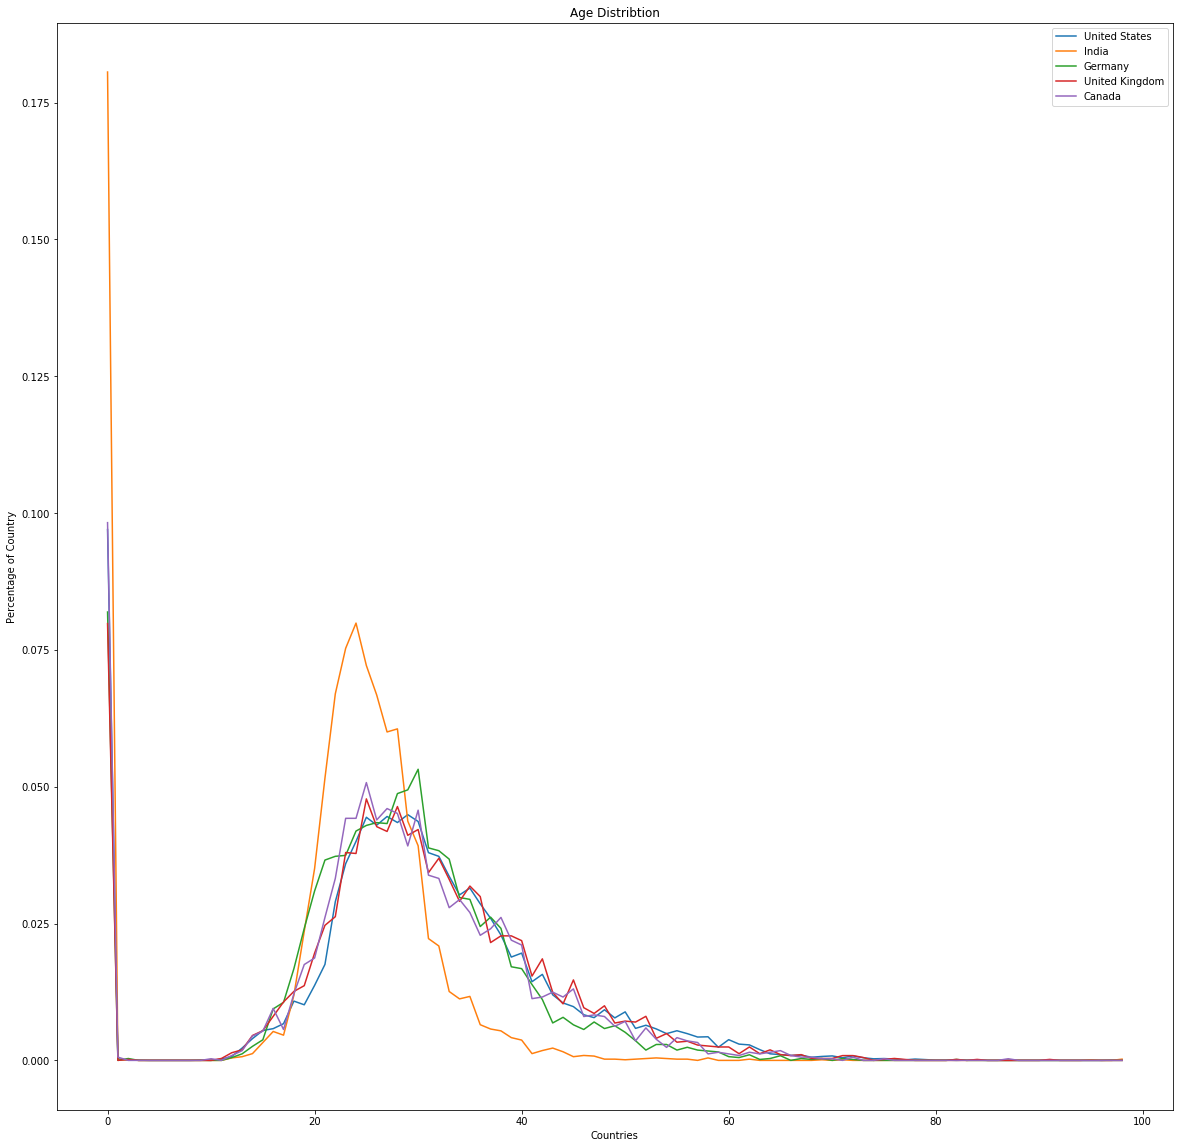

In [14]:
#Plot a line graph
plt.figure(figsize=(20,20))
plt.plot(age_distr['United States'], label='United States')
plt.plot(age_distr['India'], label='India')
plt.plot(age_distr['Germany'], label='Germany')
plt.plot(age_distr['United Kingdom'], label='United Kingdom')
plt.plot(age_distr['Canada'], label='Canada')
 
# Add labels and title
plt.title("Age Distribtion")
plt.xlabel("Countries")
plt.ylabel("Percentage of Country")
plt.legend()

plt.savefig('country_age_distrs.png', bbox_inches='tight')
plt.show()

In [19]:
survey_2019_user_elim.corr(method='spearman')

,Respondent,WorkWeekHrs,Age
Respondent,1.000000,0.000559,-0.002617
WorkWeekHrs,0.000559,1.000000,0.053470
Age,-0.002617,0.053470,1.000000
